# Init Colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My Drive/Projet Illuin OSY/Vision/facial-expression-recognition/

/content/drive/.shortcut-targets-by-id/1Vn7RRSQlcTgxvEMWQizgjwq6tPtYGKaZ/Projet Illuin OSY/Vision/facial-expression-recognition


# Install OpenCv

In [0]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

# Explore SIFT

## Add new SIFT class for 16 regular SIFT x Random Forest

In [0]:
class SIFTDetectorBIS:
    def __init__(self):
        self.detector = cv2.xfeatures2d.SIFT_create(nfeatures =16)

    def detect_keypoints(self, img):
        try:
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        except:
            gray_image = img
        return self.detector.detect(gray_image, None)

    def compute_descriptors(self, img):
        try:
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        except:
            gray_image = img
        return self.detector.detectAndCompute(gray_image, None)

## Explore SIFT keypoitns and descriptors

In [0]:
from getting_started import load_cv_images_from_fer
import matplotlib.pyplot as plt
from sift_descriptors import *

In [0]:
imgs = load_cv_images_from_fer('CV', nrows=10)

loaded images from csv


In [0]:
img = imgs[2]

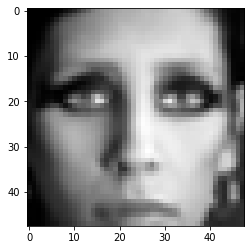

In [0]:
_ = plt.imshow(img, cmap='gray')

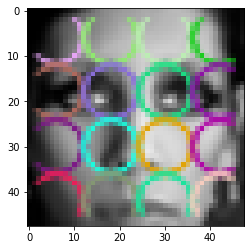

In [0]:
dd = DenseDetector()
display_image_with_keypoints(img, dd)

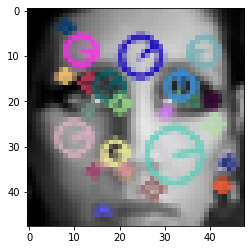

In [0]:
sf=SIFTDetector()
display_image_with_keypoints(img, sf)

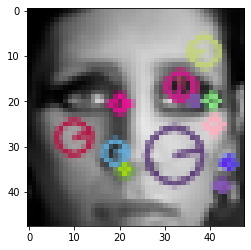

In [0]:
sfb = SIFTDetectorBIS()
display_image_with_keypoints(img, sfb)

# Random forest

## Utils to extract features from dataset

In [0]:
def bulk_extract_features(images, detector):
    descriptors = []
    for im in tqdm(images):
        try:
            descriptors.append(detector.compute_descriptors(im)[1].flatten())
        except:
            print(im)
            _ = plt.imshow(im, cmap='gray')
            descriptors.append(np.array([]))

    return descriptors

## Script to extract SIFT features from FER + cropped dataset

In [0]:
import pandas as pd
import json

In [0]:
from getting_started import *

In [0]:
imgs = []
labels = []
path = './fer_datasets/ferplus_cropped_sift_labels.csv'
all_data = pd.read_csv(path, header=0, nrows=None)
for i in range(len(all_data)):
    pixels = all_data.loc[i]['face']
    pil_img = string_to_pilimage(pixels)
    imgs.append(np.array(pil_img))
    labels.append( all_data.loc[i]['emotion'])



 39%|███▉      | 9329/23885 [00:24<00:41, 348.82it/s]

[[28 26 25 ... 22 23 25]
 [26 26 27 ... 22 23 25]
 [25 27 30 ... 22 23 24]
 ...
 [35 39 44 ... 31 31 31]
 [33 37 43 ... 31 30 31]
 [32 36 42 ... 31 30 31]]


 43%|████▎     | 10215/23885 [00:26<00:33, 402.30it/s]

[[67 69 65 ... 50 55 61]
 [68 64 61 ... 43 54 66]
 [64 57 54 ... 45 49 64]
 ...
 [44 47 48 ... 44 44 44]
 [43 47 48 ... 46 44 43]
 [44 48 49 ... 46 45 44]]


 48%|████▊     | 11384/23885 [00:29<00:31, 392.81it/s]

[[23 24 23 ... 18 17 18]
 [25 23 23 ... 19 18 18]
 [26 24 25 ... 19 19 18]
 ...
 [43 62 61 ... 28 25 26]
 [51 75 68 ... 26 23 25]
 [56 89 78 ... 25 21 23]]


 93%|█████████▎| 22201/23885 [00:57<00:04, 392.37it/s]

[[23 22 21 ... 46 43 42]
 [21 19 17 ... 50 46 44]
 [19 15 10 ... 57 51 48]
 ...
 [57 57 56 ... 52 49 47]
 [58 57 57 ... 43 41 40]
 [58 58 57 ... 37 36 35]]


 39%|███▉      | 9352/23885 [00:20<00:31, 462.41it/s]

[[28 26 25 ... 22 23 25]
 [26 26 27 ... 22 23 25]
 [25 27 30 ... 22 23 24]
 ...
 [35 39 44 ... 31 31 31]
 [33 37 43 ... 31 30 31]
 [32 36 42 ... 31 30 31]]


 43%|████▎     | 10216/23885 [00:22<00:28, 474.71it/s]

[[67 69 65 ... 50 55 61]
 [68 64 61 ... 43 54 66]
 [64 57 54 ... 45 49 64]
 ...
 [44 47 48 ... 44 44 44]
 [43 47 48 ... 46 44 43]
 [44 48 49 ... 46 45 44]]


 48%|████▊     | 11358/23885 [00:24<00:27, 452.61it/s]

[[23 24 23 ... 18 17 18]
 [25 23 23 ... 19 18 18]
 [26 24 25 ... 19 19 18]
 ...
 [43 62 61 ... 28 25 26]
 [51 75 68 ... 26 23 25]
 [56 89 78 ... 25 21 23]]


 93%|█████████▎| 22213/23885 [00:48<00:03, 457.52it/s]

[[23 22 21 ... 46 43 42]
 [21 19 17 ... 50 46 44]
 [19 15 10 ... 57 51 48]
 ...
 [57 57 56 ... 52 49 47]
 [58 57 57 ... 43 41 40]
 [58 58 57 ... 37 36 35]]


100%|██████████| 23885/23885 [00:51<00:00, 461.09it/s]


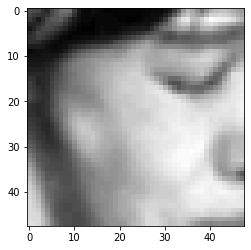

In [0]:
input_images = imgs
dense_detector = DenseDetector()
sift_detector = SIFTDetector()
sift_detector_bis = SIFTDetectorBIS()

# Dense SIFT
dense_descriptors = bulk_extract_features(input_images, dense_detector)

# regular SIFT
sift_descriptors = bulk_extract_features(input_images, sift_detector)

#16 regular SIFT
sift_bis_descriptors = bulk_extract_features(input_images, sift_detector_bis)

In [0]:
print(f"len(imgs): {len(imgs)}")
print(f"len(labels): {len(labels)}")
print(f"len(dense_descriptors): {len(dense_descriptors)}")
print(f"len(sift_descriptors): {len(sift_descriptors)}")

len(imgs): 23885
len(labels): 23885
len(dense_descriptors): 23885
len(sift_descriptors): 23885


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Dense SIFT x Random Forest

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dense_descriptors, labels, test_size=0.33, random_state=42)

In [0]:
rf = RandomForestClassifier()

In [0]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf.score(X_test, y_test)

0.671825447164785

## Regular SIFT x Random Forest

In [0]:
maxi = max([len(sift_descriptors[i]) for i in range(len(sift_descriptors))])

In [0]:
sift_descriptors = [np.pad(sift_descriptors[i], (0, maxi-len(sift_descriptors[i])), mode='constant', constant_values=-1000) for i in range(len(sift_descriptors))]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sift_descriptors, labels, test_size=0.33, random_state=42)

In [0]:
rf = RandomForestClassifier()

In [0]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf.score(X_test, y_test)

0.45959660027908156

## 16 regular SIFT x Random Forest

In [0]:
maxi = max([len(sift_descriptors[i]) for i in range(len(sift_descriptors))])

In [0]:
descriptors = [np.pad(sift_bis_descriptors[i], (0, maxi-len(sift_bis_descriptors[i])), mode='constant', constant_values=-1000) for i in range(len(sift_bis_descriptors))]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(descriptors, labels, test_size=0.33, random_state=42)

In [0]:
rf = RandomForestClassifier()

In [0]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf.score(X_test, y_test)

0.4510972979830014